# Homework 1

## BUSN 41204 - 2023

* Aman Krishna
* Christian Pavilanis
* Jingwen Li
* Yazmin Ramirez Delgado

In [427]:
import os
import pandas as pd
pd.set_option("display.precision", 4)
import numpy as np
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
import functools
from scipy import stats
import seaborn as sns
from sklearn.model_selection import LeavePOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import scipy as sp
import plotnine as p9
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
import random 
import math
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
pd.options.display.float_format = '{:.4f}'.format
pd.options.mode.chained_assignment = None  # default='warn'
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

### Q1.1
For each one the ten statements below say whether they are true or not and explain why.
#### 1. As one increases k, the number of nearest neighbor, in a kNN classifier, <br>
- (a) the bias of the classifier will increase; <br>
  - *True,* as we are increasing the nearest neighbors, we are fitting the model less closely to the data to make it generalizable. If we set k to a low value (high complexity), it will tend to overfit the data. It will be very accurate in the training set, although this will not necessarily translate out of sample. <br>
- (b) the variance of the classifier will increase; <br>
  - *False*, bias, and variance are a trade-off in model calibration. As k increases (low complexity), the relationship would be least smooth. In a 2D graph, this means the curve will get smoother and smoother until eventually, it reaches 0 variances when k is equal to the number of observations. <br>
- (c) the misclassification rate on the training dataset will increase; <br>
  - *True*, aas we are smoothing out the relationship, the classifier will be less sensitive to outliers and may tend to misclassify them. This is acceptable because we are more interested in out-of-sample performance than in-sample performance. We do not want to overfit.  <br>
- (d) the misclassification rate on a test dataset will increase. <br>
  - *True/ False*, there is no definitive answer. There is a balance between variance and bias in the training set that must be considered when selecting the appropriate k. If k is way too low, we are overfitting the training set and will not have any explanatory power in the rest of the data. If k is way too high, we are underfitting and will not capture any meaningful relationship in the training set. <br>

### Q1.2
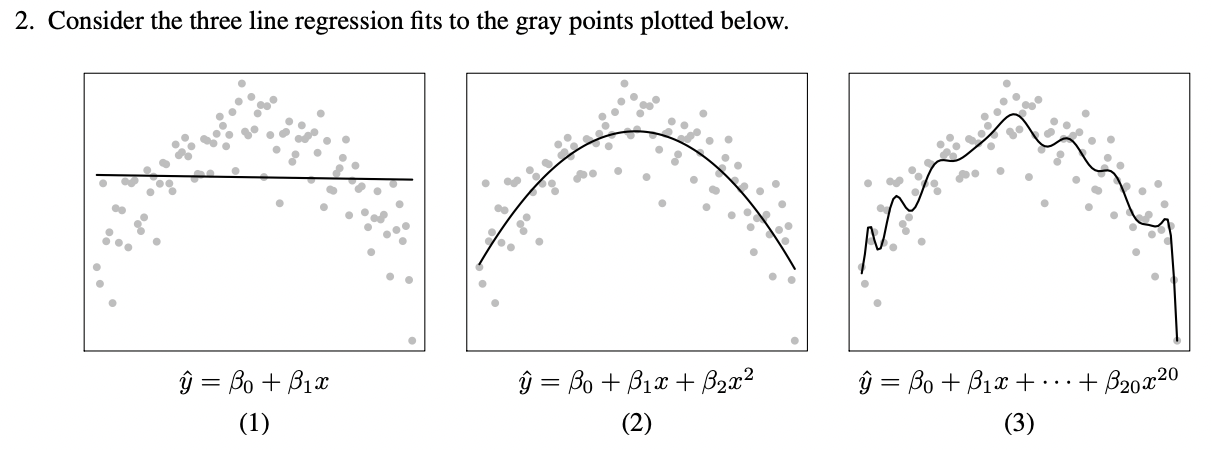



- (a) The estimate in (2) has a higher variance than the estimate in (1).
  - **True**, as the number of nearest neighbors decreases ((2) compare to (1)), the variance of the classifier will increase due to bias-variance trade-off. <br>
- (b) The estimate in (2) has a higher bias than the estimate in (3).
  - **True**,  (3) is a more complex model than (2), hence it will have a lower bias than (2). <br>
- (c) The estimate in (3) has the smallest training error.
  - **True**, (3) is the most complex model (lowest k), hence it will have the smallest training error. <br>
- (d) The estimate in (1) has the smallest test error.
  - **False**, (1) has the highest k-value, hence, it appears to be at the edge of our U-shaped curve, indicating in a higher than the lowest training error (often referred to as underfitting). <br>

### Q1.3
#### Misclassification rate of a classifier evaluated on a validation set will never be smaller than the one evaluated on the training set that is used to build the classifier.
- **False**. Generally, as the model created using the training dataset, and the validation/test set is an unknown dataset for the model, it has higher misclassification rate. But there still remains a possibility that the validation set (by sheer luck or coincidence!) performs equivalent or better than the training set. The word "never" used in the statement presents an impossibility clause.  <br>


### Q1.4
#### k-fold cross-validation provides an unbiased estimate of the predictive error of the models
- **False** It is very difficult or almost impossible to obtain unbiased estimates of predictive errors since we are never using the complete dataset for training, i.e., we always miss some data (kept for validation/test). Furthermore, lower number of folds (k) means higher bias. <br>

## Q2 Run a simulation study to explore the bias-variance trade-off in more depth
#### 1. You will start by exploring a scenario where the true relationship between x and y is linear. You will generate data from the linear model $ y = f(x) + \epsilon $ <br> where $ f(x) = 1.8x + 2 $

In [225]:
def gen_data_yaz(N):
    np.random.seed(410)
    x,y = [],[]
    for i in range(N):
        a = random.uniform(-1,1)
        epsilon = np.random.normal(0,0.1)
        yy = 1.8*a + 2 + epsilon
        
        x.append([a])
        y.append([yy])
        
    return np.array(x), np.array(y)

In [238]:
x,y=gen_data_yaz(100)

In [227]:
x_t,y_t = gen_data_yaz(10000)

#### 2. Create a scatter plot of $y$ vs $x$. In the same figure, draw the true relationship in black solid line.

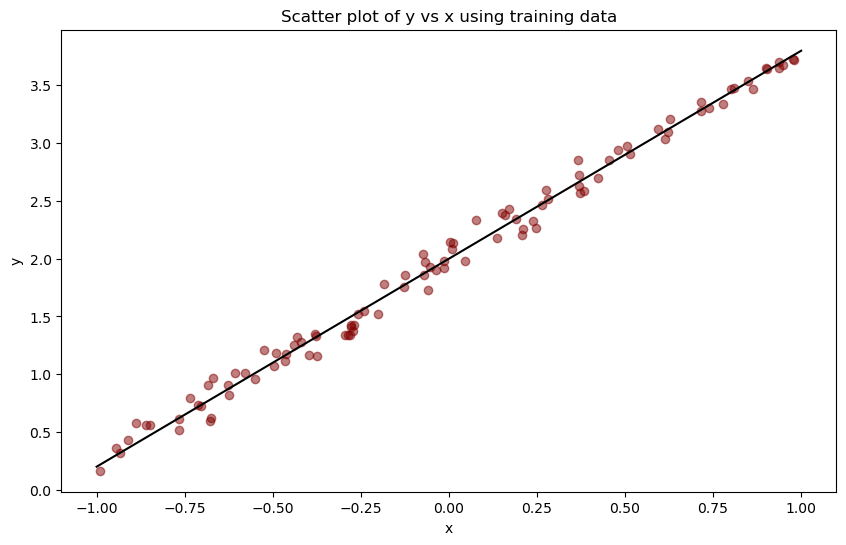

In [228]:
#plot y_train vs x_train
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x,y, color='maroon', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot([-1,1], [1.8*-1+2, 1.8*1+2], color='black')
ax.set_title('Scatter plot of y vs x using training data')
plt.show()

#### 3. Using ordinary linear regression, find a relationship between y and x of the form <br> $y = b_0 + b_1 × x + e$ <br> using the training data you simulated. On the same plot from the last question, draw a blue dashed line that is the least squares fit to the data.

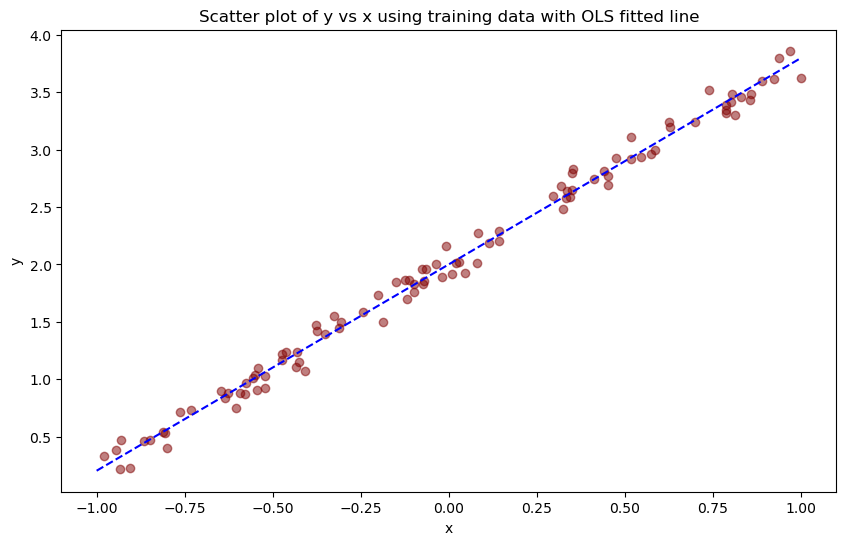

In [317]:
#Use ols to fit a linear regression model between y_train and x_train
res = ols('y ~ x', data=pd.DataFrame({'y':y[:,0], 'x':x[:,0]})).fit()
#on the same plot as above, plot the fitted line blue dashed line
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x,y, color='maroon', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.plot([-1,1], [1.8*-1+2, 1.8*1+2], color='black', alpha=0.2)
ax.plot([-1,1], [res.params[0]+res.params[1]*-1, res.params[0]+res.params[1]*1], color='blue', linestyle='dashed')
ax.set_title('Scatter plot of y vs x using training data with OLS fitted line')
plt.show()

#### 4. Now, use k-NN to find the relationship between y and x. You should experiment with k = 2, 3, · · · , 15 to see how model complexity affects prediction accuracy. On one plot, redraw the scatter plot and the true relationship, but this time overlay it with predicted fit using k-NN with k = 2. On a juxtaposed graph, do the same for k = 12

In [350]:
def knn_performance(k=17, datagenerator=gen_data_yaz):
    x,y=datagenerator(100)
    x_t,y_t = datagenerator(10000)
    mse = pd.DataFrame(columns=['k','mse','complexity'])
    score = pd.DataFrame(columns=['k','test_score','train_score'])
    for i in range(1,k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x,y)
        y_pred = knn.predict(x)
        test_score = knn.score(x_t,y_t)
        train_score = knn.score(x,y)
        y_pred_t = knn.predict(x_t)
        mse = pd.concat([mse, pd.DataFrame({'k':[i], 'mse':[mean_squared_error(y_t,y_pred_t)], 'complexity':[np.log(1/i)]})])
        score = pd.concat([score, pd.DataFrame({'k':[i], 'test_score':[test_score], 'train_score':[train_score]})])
        
        if i==2 or i==12:
            merged = pd.concat([pd.DataFrame(x), pd.DataFrame(y_pred)], axis=1)
            merged.columns = ['x', 'y_pred']
            
            #sort the merged dataframe by x
            merged = merged.sort_values(by=['x'])
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.plot(merged['x'], merged['y_pred'], color='blue')
            #ax.plot([-1,1], [1.8*-1+2, 1.8*1+2], color='black', alpha=0.4)
            ax.scatter(x,y, color='maroon', alpha=0.5)
            ax.legend(['knn', 'true', 'data'])
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_title('Scatter plot of y vs x using training data with KNN fitted line for k={}'.format(i))
            plt.show()
        
    mse.set_index('k', inplace=True)
    score = score.set_index('k')
    return mse, score

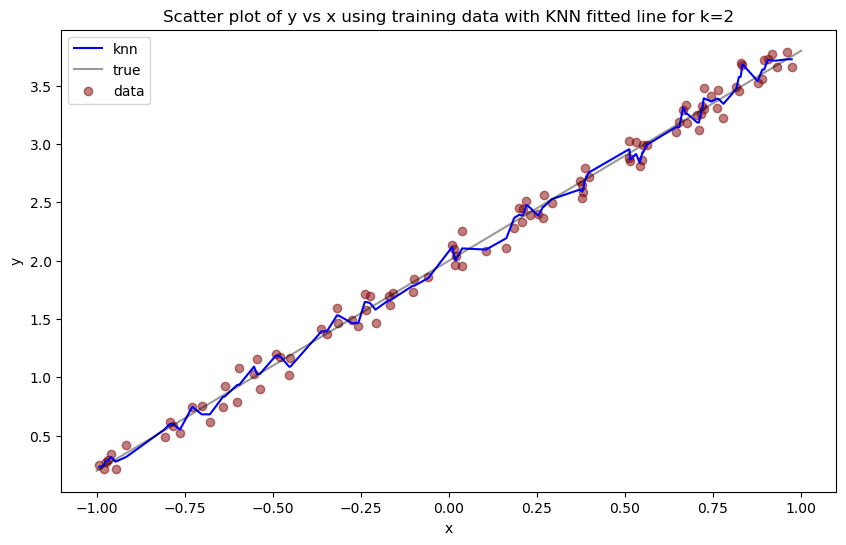

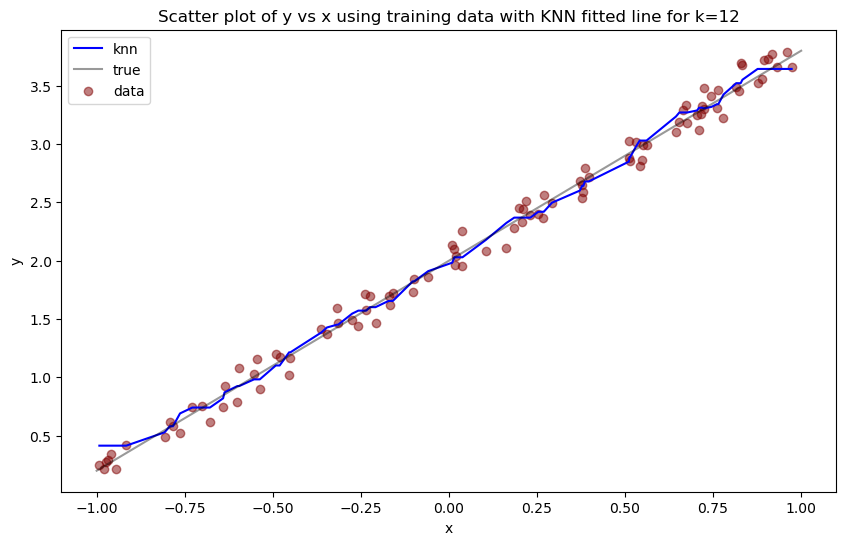

/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


In [311]:
mse, score = knn_performance(15)

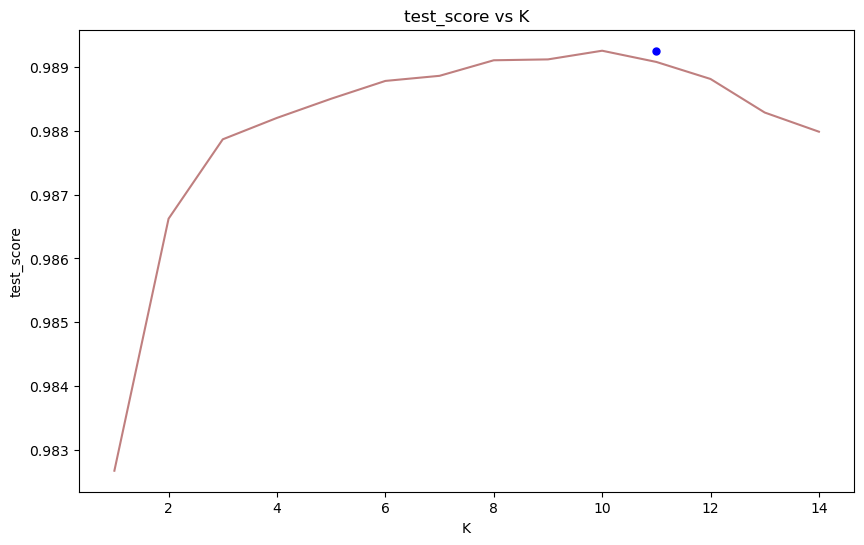

In [312]:
#plot a smooth curve for KNN Y prediction
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(score.index, score['test_score'], color='maroon', alpha=0.5)
ax.set_xlabel('K')
ax.set_ylabel('test_score')
#highlight the best K
ax.plot(score.index[score['test_score'].idxmax()], score['test_score'].max(), marker='o', markersize=5, color="blue")
ax.set_title('test_score vs K')
plt.show()

#### We note that as k increases the test_score increases to reach a maximum point and then starts diminishing. The two edges of the above graph represent the two extremes of the bias-variance trade-off. At the right edge, the model is too simple and has high bias. At the left edge, the model is too complex and has high variance. The optimal value of k is the one that minimizes the test error. <br>

#### 5. Plot the test set mean squared error using k-NN against log(1/k) for k = 2, 3, · · · , 15. On the same graph, draw a horizontal dashed line that represents the test set mean squared error using linear regression. Which model performs the best? Comment on the relative performance of linear regression and k-NN with different values of k.

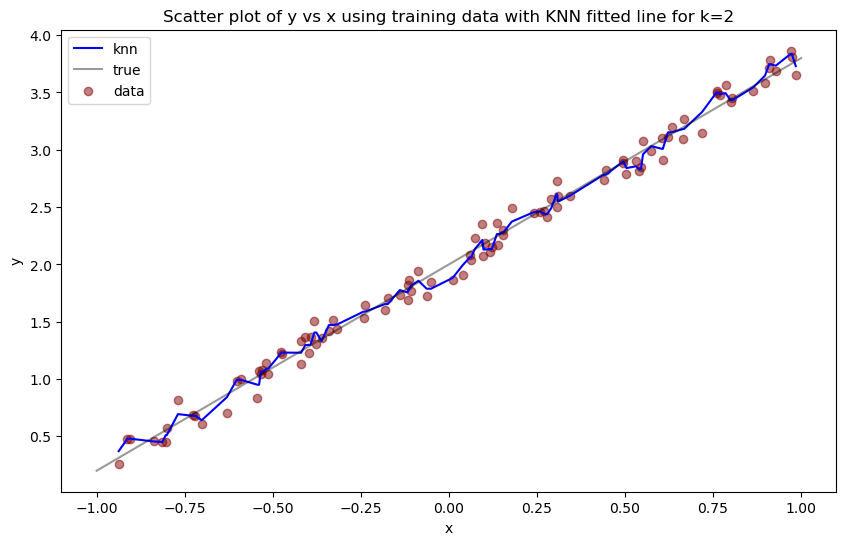

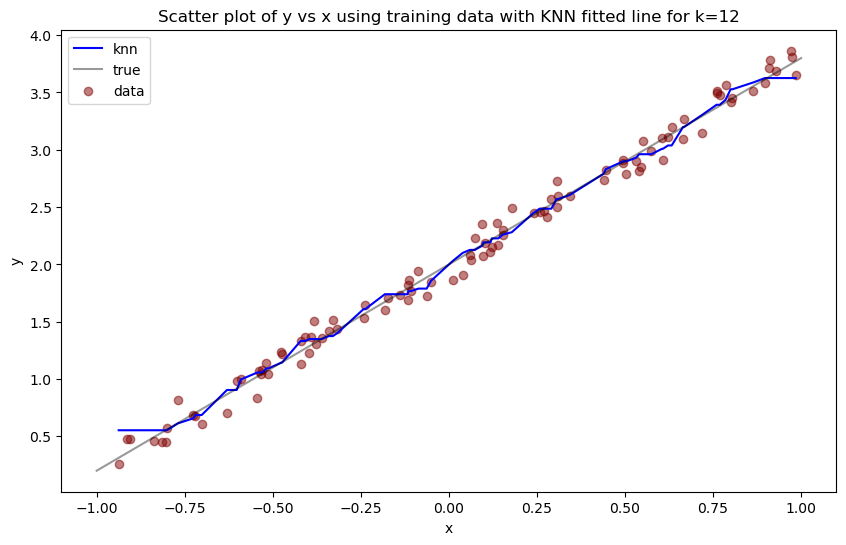

/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


In [314]:
mse, score = knn_performance(30)

### PLotting OLS model with the test set

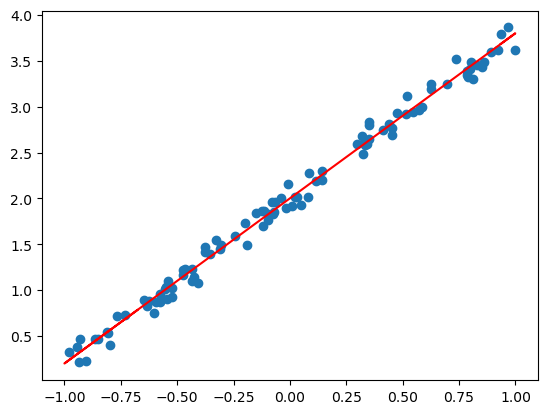

In [339]:
#add constant to x
x_new = sm.add_constant(x)
model = sm.OLS(y, x_new).fit()
x_t_new = sm.add_constant(x_t)
mean_squared_error(y_t, model.predict(x_t_new))
plt.scatter(x,y)
plt.plot(x_t, model.predict(x_t_new), color='red')

### Comparing the MSE of OLS and kNN models

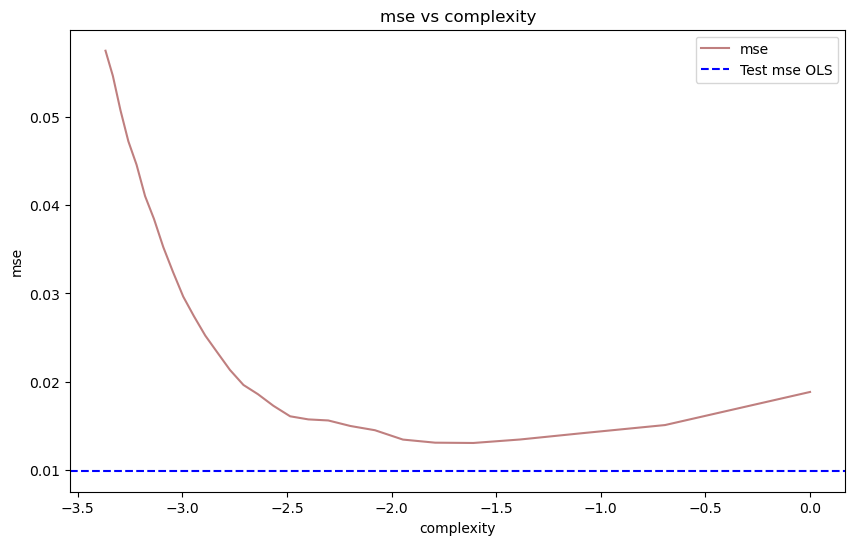

In [340]:
#plot mse vs complexity
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mse['complexity'], mse['mse'], color='maroon', alpha=0.5)
ax.set_xlabel('complexity')
ax.set_ylabel('mse')
#On the same graph, draw a horizontal dashed line that represents the test set mean squared error using linear regression using x_t and y_t

ax.axhline(y=mean_squared_error(y_t, model.predict(x_t_new)), color='blue', linestyle='dashed')
ax.set_title('mse vs complexity')
#create a legend
ax.legend(['mse', 'Test mse OLS'])
plt.show()



#### The Linear Regression performs extremely well which is understandable given that we are looking at a strictly linear data generating function with very little normalised noise (epsilon)

### 6. Redo 1-5, but consider a different data generating process where the true relationship between x and y is near, but not perfectly linear.

In [341]:
def gen_data_aman(N):
    np.random.seed(410)
    x,y = [],[]
    for i in range(N):
        a = random.uniform(-1,1)
        epsilon = np.random.normal(0,0.1)
        #yy =tanh(1.1×a)+2+epsilon
        yy = np.tanh(1.1*a)+2+epsilon
        
        x.append([a])
        y.append([yy])
        
    return np.array(x), np.array(y)

In [343]:
x,y=gen_data_aman(100)
x_t,y_t = gen_data_aman(10000)

#### Create a scatter plot of $y$ vs $x$. In the same figure, draw the true relationship in black solid line.

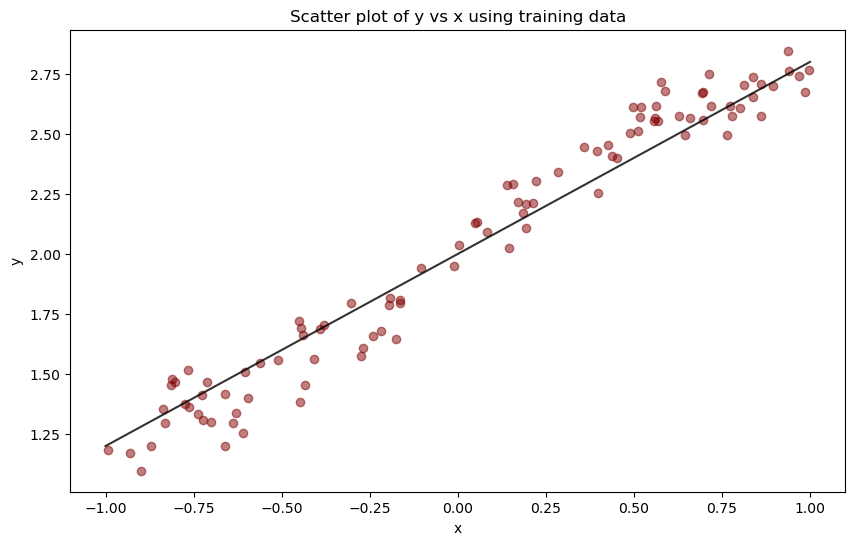

In [346]:
#plot y_train vs x_train
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x,y, color='maroon', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot([-1,1], [np.tanh(1.1*-1)+2, np.tanh(1.1*1)+2], color='black', alpha=0.8)
ax.set_title('Scatter plot of y vs x using training data')
plt.show()

### Using ordinary linear regression, find a relationship between y and x of the form <br> $y = b_0 + b_1 × x + e$ <br> using the training data you simulated. On the same plot from the last question, draw a blue dashed line that is the least squares fit to the data.

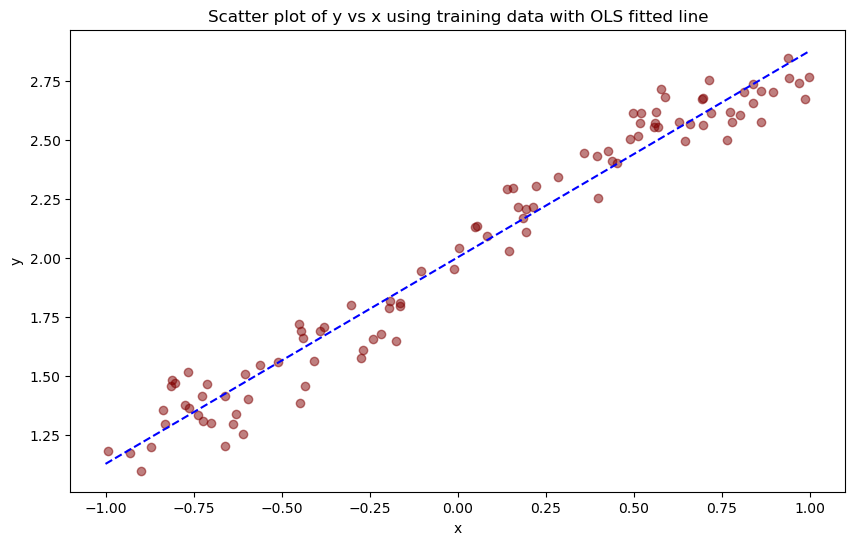

In [347]:
#Use ols to fit a linear regression model between y_train and x_train
res = ols('y ~ x', data=pd.DataFrame({'y':y[:,0], 'x':x[:,0]})).fit()
#on the same plot as above, plot the fitted line blue dashed line
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x,y, color='maroon', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.plot([-1,1], [1.8*-1+2, 1.8*1+2], color='black', alpha=0.2)
ax.plot([-1,1], [res.params[0]+res.params[1]*-1, res.params[0]+res.params[1]*1], color='blue', linestyle='dashed')
ax.set_title('Scatter plot of y vs x using training data with OLS fitted line')
plt.show()

#### Now, use k-NN to find the relationship between y and x. You should experiment with k = 2, 3, · · · , 15 to see how model complexity affects prediction accuracy. On one plot, redraw the scatter plot and the true relationship, but this time overlay it with predicted fit using k-NN with k = 2. On a juxtaposed graph, do the same for k = 12

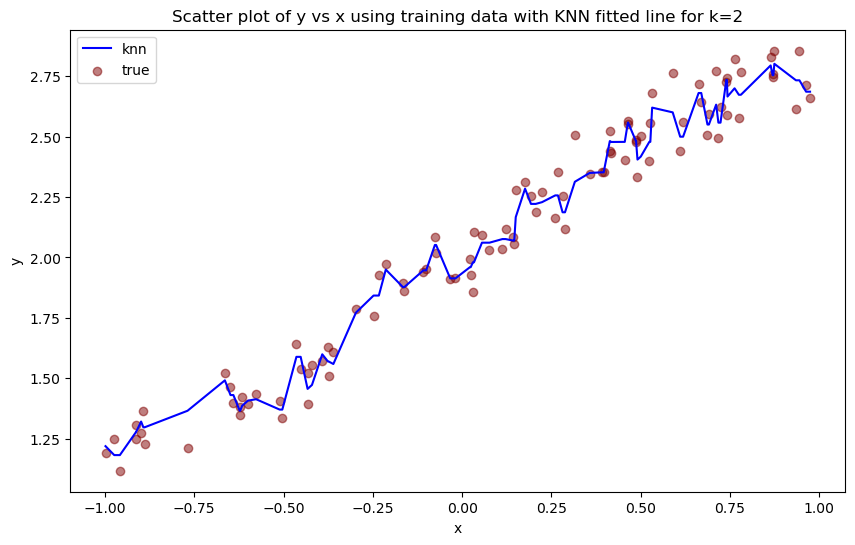

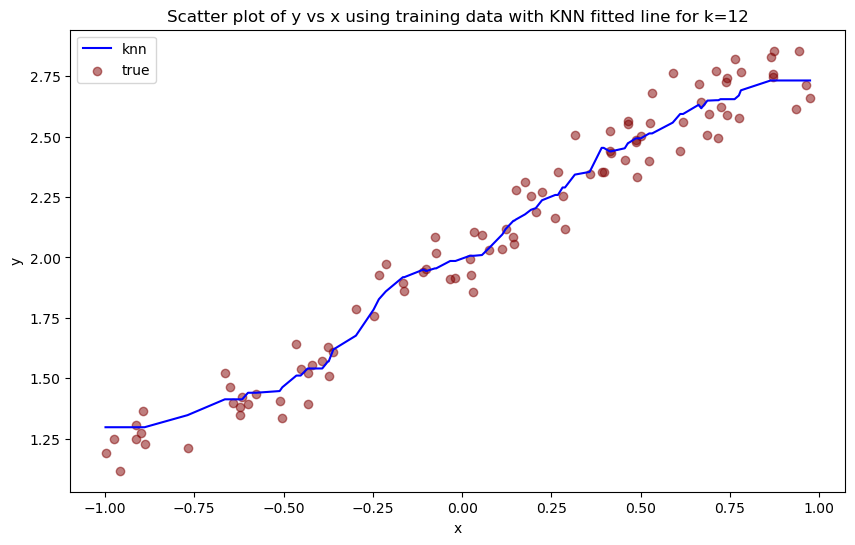

/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


In [356]:
mse, score = knn_performance(30,gen_data_aman)

### PLot the test score vs K

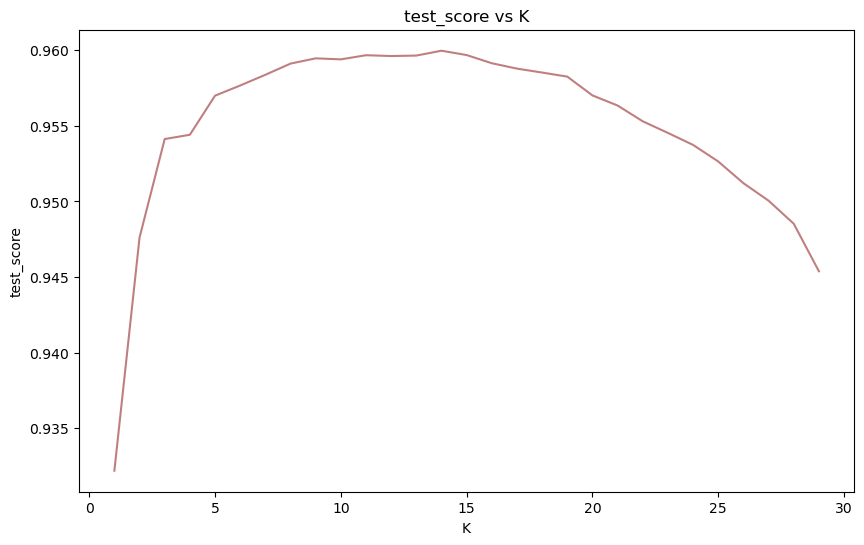

In [357]:
#plot a smooth curve for KNN Y prediction
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(score.index, score['test_score'], color='maroon', alpha=0.5)
ax.set_xlabel('K')
ax.set_ylabel('test_score')
#highlight the best K
#ax.plot(score.index[score['test_score'].idxmax()], score['test_score'].max(), marker='o', markersize=5, color="blue")
ax.set_title('test_score vs K')
plt.show()

### PLotting OLS model with the test set

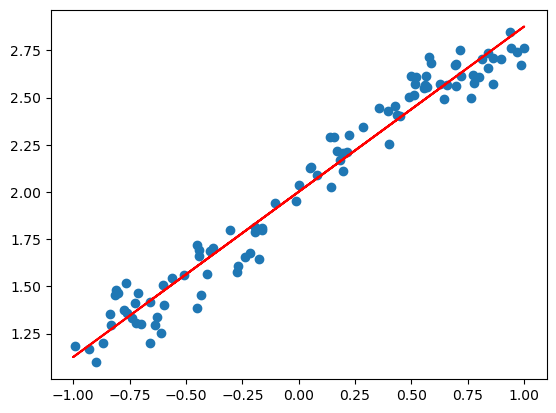

In [358]:
#add constant to x
x_new = sm.add_constant(x)
model = sm.OLS(y, x_new).fit()
x_t_new = sm.add_constant(x_t)
mean_squared_error(y_t, model.predict(x_t_new))
plt.scatter(x,y)
plt.plot(x_t, model.predict(x_t_new), color='red')

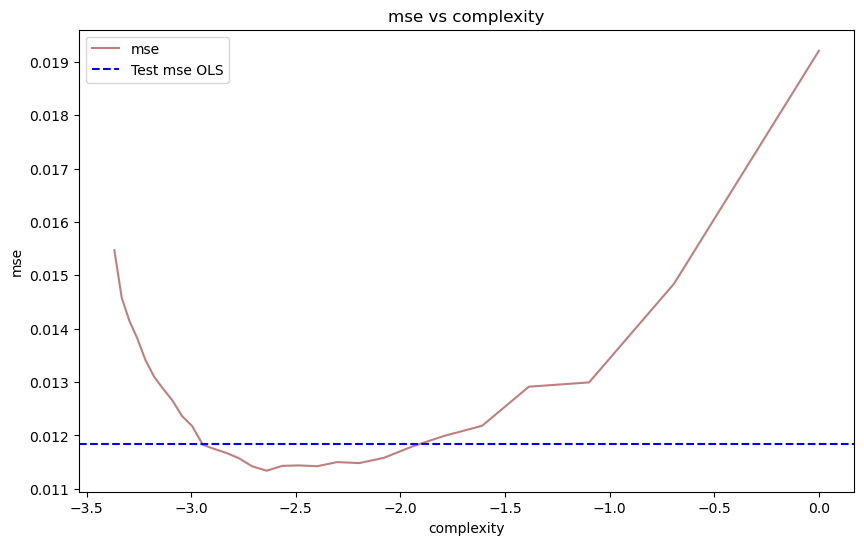

In [359]:
#plot mse vs complexity
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mse['complexity'], mse['mse'], color='maroon', alpha=0.5)
ax.set_xlabel('complexity')
ax.set_ylabel('mse')
#On the same graph, draw a horizontal dashed line that represents the test set mean squared error using linear regression using x_t and y_t

ax.axhline(y=mean_squared_error(y_t, model.predict(x_t_new)), color='blue', linestyle='dashed')
ax.set_title('mse vs complexity')
#create a legend
ax.legend(['mse', 'Test mse OLS'])
plt.show()



#### The Linear Regression model still performs good, but we see a range of K's where the KNN model performs better than the OLS model. This is because the data generating function is not strictly linear, and hence the OLS model is not able to capture the true relationship between X and Y.

### 7. Consider yet another data generating process where the true relationship is strongly non-linear. 

In [360]:
def gen_data_jing(N):
    np.random.seed(410)
    x,y = [],[]
    for i in range(N):
        a = random.uniform(-1,1)
        epsilon = np.random.normal(0,0.1)
        #yy =sin(2 * a)+2+epsilon
        yy = np.sin(2 * a)+2+epsilon
        
        x.append([a])
        y.append([yy])
        
    return np.array(x), np.array(y)

In [362]:
x,y=gen_data_jing(100)
x_t,y_t = gen_data_jing(10000)

#### Create a scatter plot of $y$ vs $x$. In the same figure, draw the true relationship in black solid line.

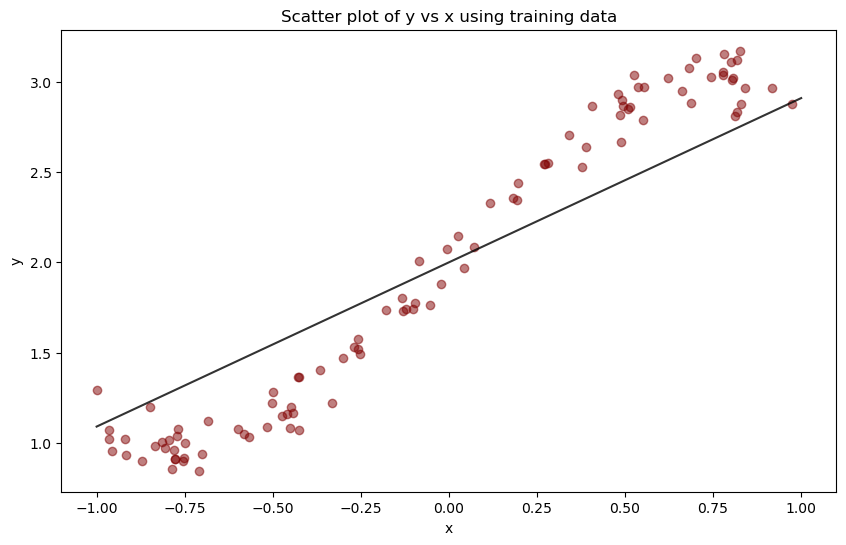

In [363]:
#plot y_train vs x_train
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x,y, color='maroon', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot([-1,1], [np.sin(2*-1)+2, np.sin(2*1)+2], color='black', alpha=0.8)
ax.set_title('Scatter plot of y vs x using training data')
plt.show()

### Using ordinary linear regression, find a relationship between y and x of the form <br> $y = b_0 + b_1 × x + e$ <br> using the training data you simulated. On the same plot from the last question, draw a blue dashed line that is the least squares fit to the data.

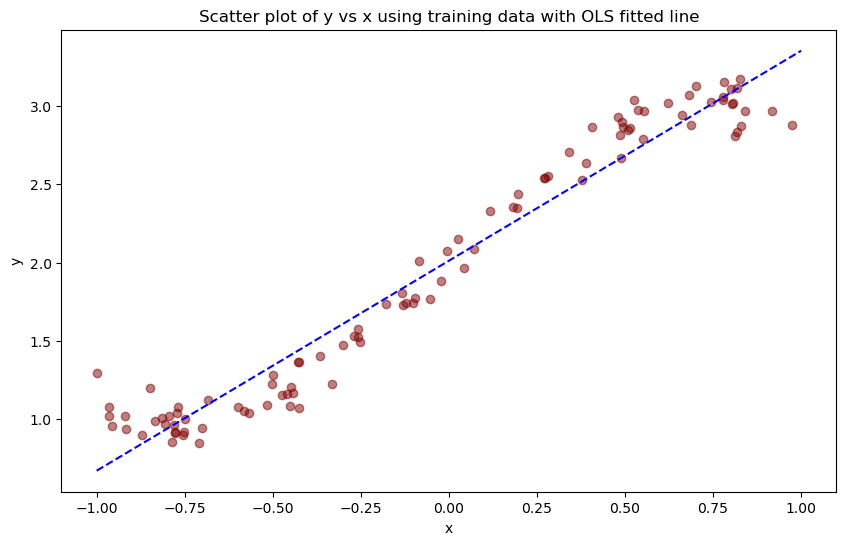

In [364]:
#Use ols to fit a linear regression model between y_train and x_train
res = ols('y ~ x', data=pd.DataFrame({'y':y[:,0], 'x':x[:,0]})).fit()
#on the same plot as above, plot the fitted line blue dashed line
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x,y, color='maroon', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.plot([-1,1], [1.8*-1+2, 1.8*1+2], color='black', alpha=0.2)
ax.plot([-1,1], [res.params[0]+res.params[1]*-1, res.params[0]+res.params[1]*1], color='blue', linestyle='dashed')
ax.set_title('Scatter plot of y vs x using training data with OLS fitted line')
plt.show()

#### Now, use k-NN to find the relationship between y and x. You should experiment with k = 2, 3, · · · , 15 to see how model complexity affects prediction accuracy. On one plot, redraw the scatter plot and the true relationship, but this time overlay it with predicted fit using k-NN with k = 2. On a juxtaposed graph, do the same for k = 12

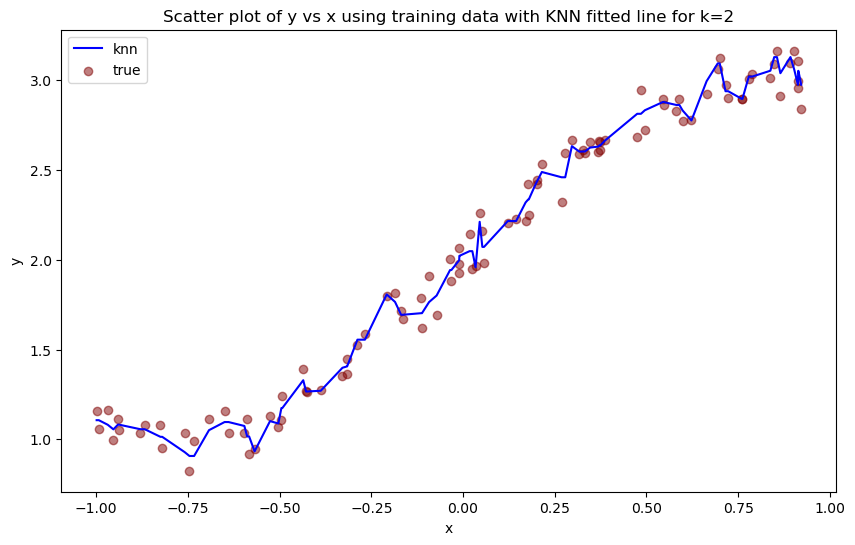

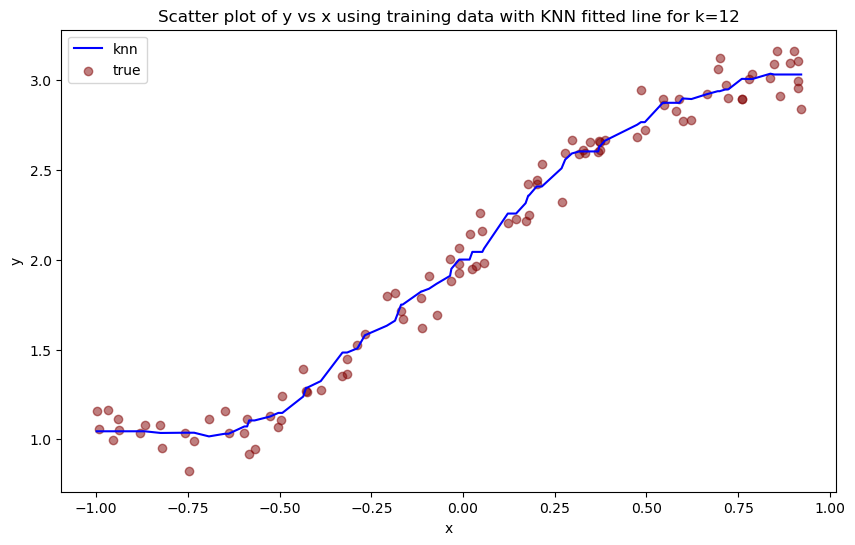

/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


In [365]:
mse, score = knn_performance(30,gen_data_jing)

### PLot the test score vs K

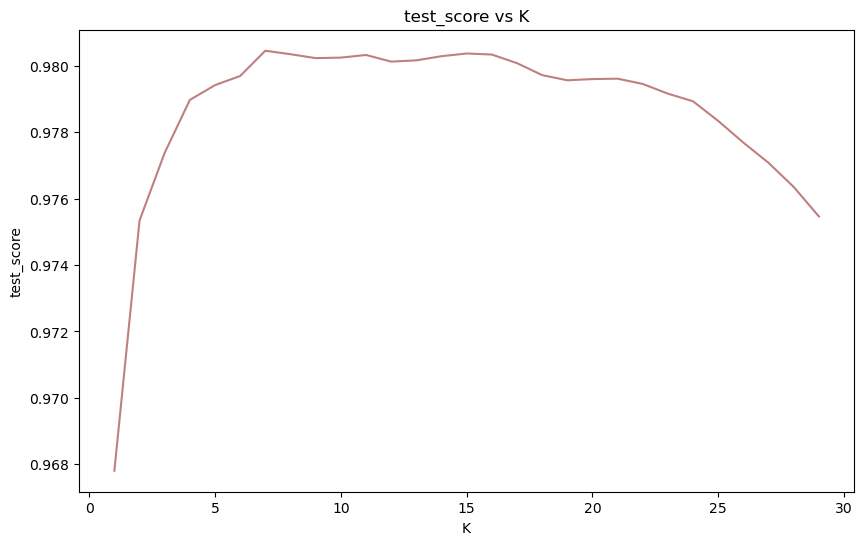

In [366]:
#plot a smooth curve for KNN Y prediction
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(score.index, score['test_score'], color='maroon', alpha=0.5)
ax.set_xlabel('K')
ax.set_ylabel('test_score')
#highlight the best K
#ax.plot(score.index[score['test_score'].idxmax()], score['test_score'].max(), marker='o', markersize=5, color="blue")
ax.set_title('test_score vs K')
plt.show()

### PLotting OLS model with the test set

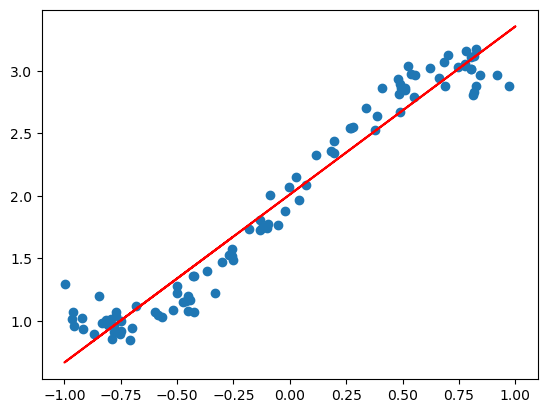

In [367]:
#add constant to x
x_new = sm.add_constant(x)
model = sm.OLS(y, x_new).fit()
x_t_new = sm.add_constant(x_t)
mean_squared_error(y_t, model.predict(x_t_new))
plt.scatter(x,y)
plt.plot(x_t, model.predict(x_t_new), color='red')

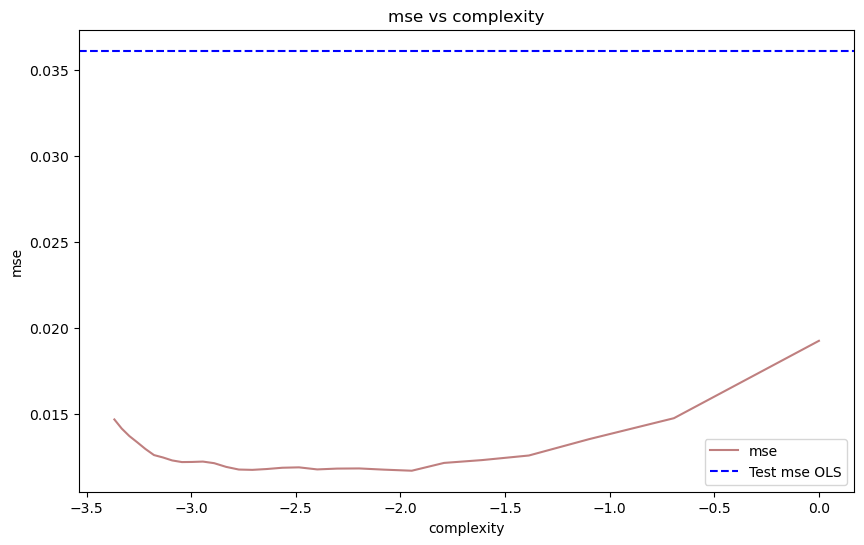

In [368]:
#plot mse vs complexity
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mse['complexity'], mse['mse'], color='maroon', alpha=0.5)
ax.set_xlabel('complexity')
ax.set_ylabel('mse')
#On the same graph, draw a horizontal dashed line that represents the test set mean squared error using linear regression using x_t and y_t

ax.axhline(y=mean_squared_error(y_t, model.predict(x_t_new)), color='blue', linestyle='dashed')
ax.set_title('mse vs complexity')
#create a legend
ax.legend(['mse', 'Test mse OLS'])
plt.show()



#### The Linear Regression model performs extremely poorly, and the KNN model performs better than the OLS model for all values of K. This is because the data generating function is not linear, and hence the OLS model is not able to capture the true relationship between X and Y.

#### 8. You might suspect, from your previous results, that in real world when none of the relationship could be linear, it would always pay off using k-NN over linear regression. Examine this hypothesis in the situation with more than 1 variable. 

In [369]:
def gen_data_christ(N, p=1):
    np.random.seed(410)
    x,y = [],[]
    for i in range(N):
        noise=0
        a = random.uniform(-1,1)
        epsilon = np.random.normal(0,0.1)
        #yy =sin(2 * a)+2+epsilon
        for j in range(p):
            noise+=random.uniform(-1,1)
        yy = np.sin(2 * a)+2+epsilon + noise
        
        x.append([a])
        y.append([yy])
        
    return np.array(x), np.array(y)

In [371]:
x,y=gen_data_christ(100,1)
x_t,y_t = gen_data_christ(10000,1)

In [374]:
def knn_performance(k=17, datagenerator=gen_data_yaz,p=1, plot=False):
    x,y=datagenerator(100,p)
    x_t,y_t = datagenerator(10000,p)
    mse = pd.DataFrame(columns=['k','mse','complexity'])
    score = pd.DataFrame(columns=['k','test_score','train_score'])
    for i in range(1,k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x,y)
        y_pred = knn.predict(x)
        test_score = knn.score(x_t,y_t)
        train_score = knn.score(x,y)
        y_pred_t = knn.predict(x_t)
        mse = pd.concat([mse, pd.DataFrame({'k':[i], 'mse':[mean_squared_error(y_t,y_pred_t)], 'complexity':[np.log(1/i)]})])
        score = pd.concat([score, pd.DataFrame({'k':[i], 'test_score':[test_score], 'train_score':[train_score]})])
        
        if (i==2 or i==12) and plot:
            merged = pd.concat([pd.DataFrame(x), pd.DataFrame(y_pred)], axis=1)
            merged.columns = ['x', 'y_pred']
            
            #sort the merged dataframe by x
            merged = merged.sort_values(by=['x'])
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.plot(merged['x'], merged['y_pred'], color='blue')
            #ax.plot([-1,1], [1.8*-1+2, 1.8*1+2], color='black', alpha=0.4)
            ax.scatter(x,y, color='maroon', alpha=0.5)
            ax.legend(['knn', 'true', 'data'])
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_title('Scatter plot of y vs x using training data with KNN fitted line for k={}'.format(i))
            plt.show()
        
    mse.set_index('k', inplace=True)
    score = score.set_index('k')
    return mse, score

## P=1

/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


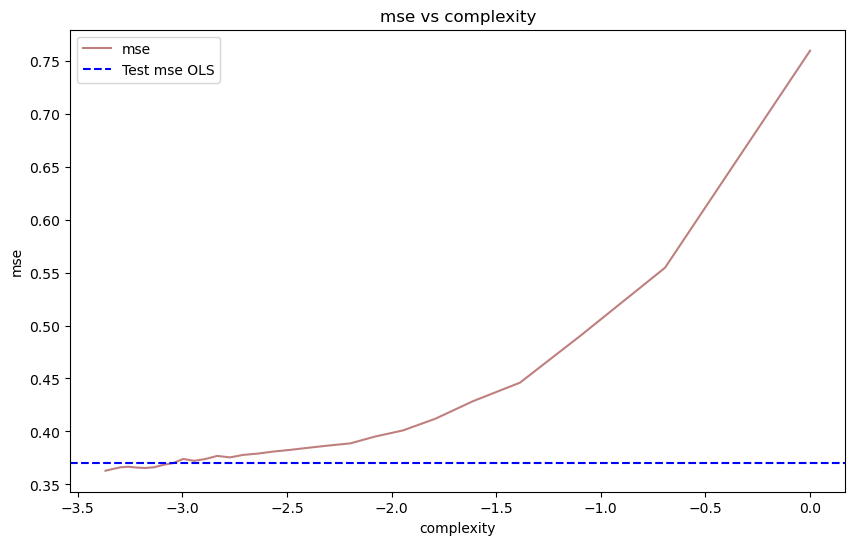

In [382]:
mse, score = knn_performance(30,gen_data_christ,1,False)
#add constant to x
x_new = sm.add_constant(x)
model = sm.OLS(y, x_new).fit()
x_t_new = sm.add_constant(x_t)
mse_ols = mean_squared_error(y_t, model.predict(x_t_new))
#plot mse vs complexity
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mse['complexity'], mse['mse'], color='maroon', alpha=0.5)
ax.set_xlabel('complexity')
ax.set_ylabel('mse')
#On the same graph, draw a horizontal dashed line that represents the test set mean squared error using linear regression using x_t and y_t

ax.axhline(y=mean_squared_error(y_t, model.predict(x_t_new)), color='blue', linestyle='dashed')
ax.set_title('mse vs complexity')
#create a legend
ax.legend(['mse', 'Test mse OLS'])
plt.show()



## P=2

/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


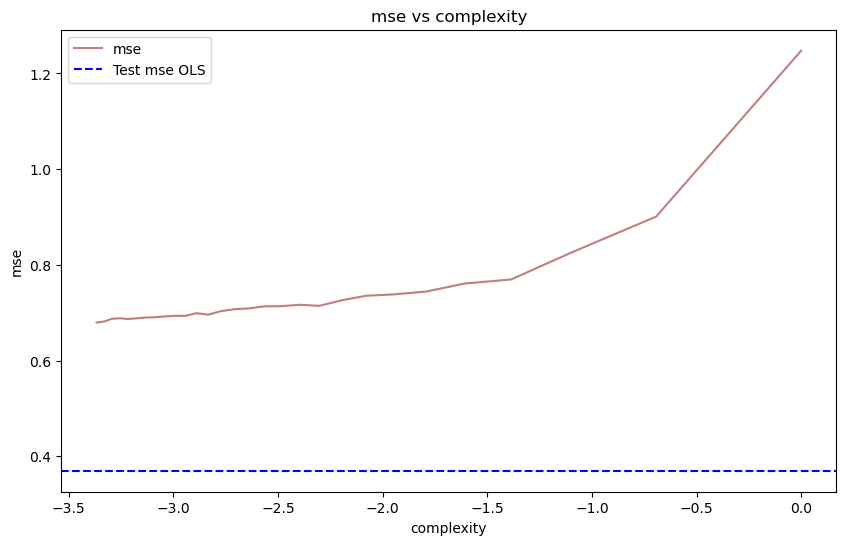

In [383]:
mse, score = knn_performance(30,gen_data_christ,2,False)
#add constant to x
x_new = sm.add_constant(x)
model = sm.OLS(y, x_new).fit()
x_t_new = sm.add_constant(x_t)
mse_ols = mean_squared_error(y_t, model.predict(x_t_new))
#plot mse vs complexity
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mse['complexity'], mse['mse'], color='maroon', alpha=0.5)
ax.set_xlabel('complexity')
ax.set_ylabel('mse')
#On the same graph, draw a horizontal dashed line that represents the test set mean squared error using linear regression using x_t and y_t

ax.axhline(y=mean_squared_error(y_t, model.predict(x_t_new)), color='blue', linestyle='dashed')
ax.set_title('mse vs complexity')
#create a legend
ax.legend(['mse', 'Test mse OLS'])
plt.show()



## P=5

/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


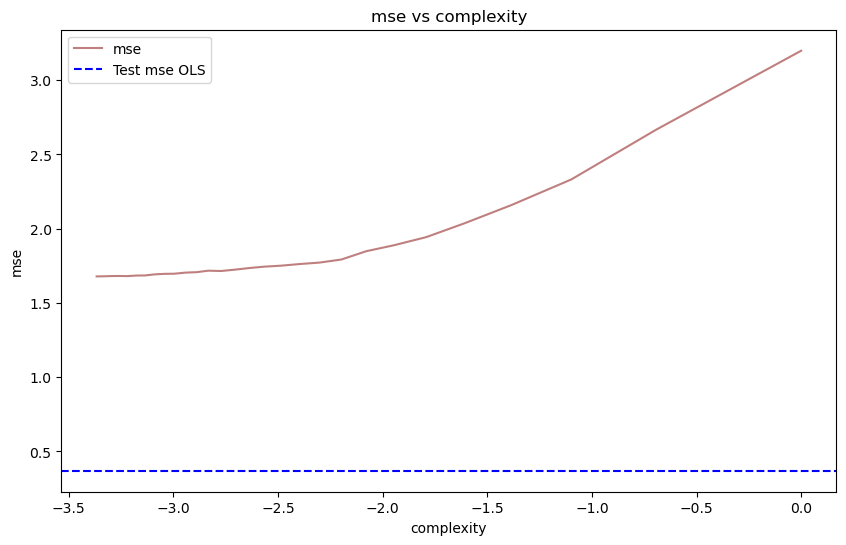

In [384]:
mse, score = knn_performance(30,gen_data_christ,5,False)
#add constant to x
x_new = sm.add_constant(x)
model = sm.OLS(y, x_new).fit()
x_t_new = sm.add_constant(x_t)
mse_ols = mean_squared_error(y_t, model.predict(x_t_new))
#plot mse vs complexity
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mse['complexity'], mse['mse'], color='maroon', alpha=0.5)
ax.set_xlabel('complexity')
ax.set_ylabel('mse')
#On the same graph, draw a horizontal dashed line that represents the test set mean squared error using linear regression using x_t and y_t

ax.axhline(y=mean_squared_error(y_t, model.predict(x_t_new)), color='blue', linestyle='dashed')
ax.set_title('mse vs complexity')
#create a legend
ax.legend(['mse', 'Test mse OLS'])
plt.show()



## P=10

/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


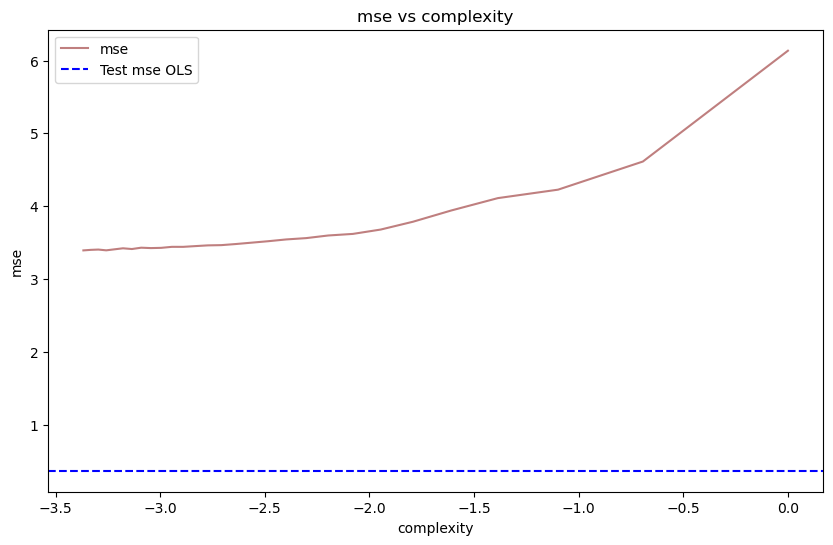

In [385]:
mse, score = knn_performance(30,gen_data_christ,10,False)
#add constant to x
x_new = sm.add_constant(x)
model = sm.OLS(y, x_new).fit()
x_t_new = sm.add_constant(x_t)
mse_ols = mean_squared_error(y_t, model.predict(x_t_new))
#plot mse vs complexity
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mse['complexity'], mse['mse'], color='maroon', alpha=0.5)
ax.set_xlabel('complexity')
ax.set_ylabel('mse')
#On the same graph, draw a horizontal dashed line that represents the test set mean squared error using linear regression using x_t and y_t

ax.axhline(y=mean_squared_error(y_t, model.predict(x_t_new)), color='blue', linestyle='dashed')
ax.set_title('mse vs complexity')
#create a legend
ax.legend(['mse', 'Test mse OLS'])
plt.show()



## P=20

/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)


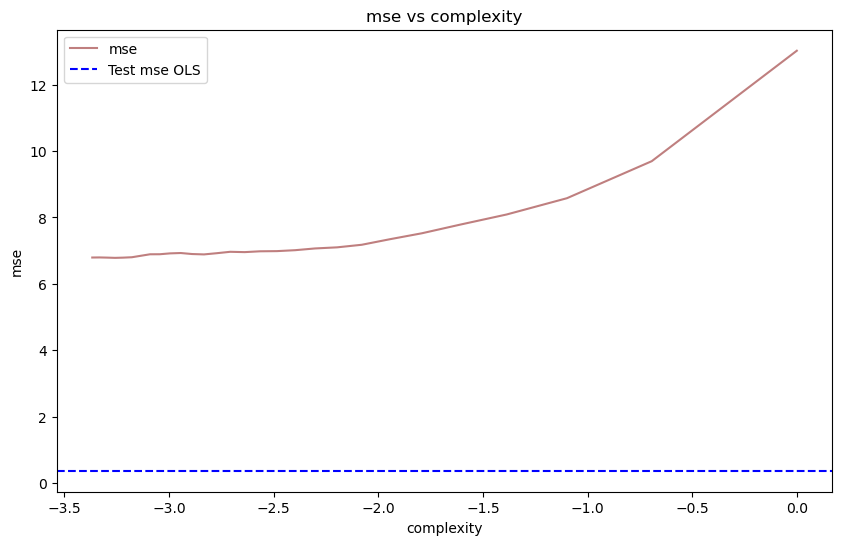

In [386]:
mse, score = knn_performance(30,gen_data_christ,20,False)
#add constant to x
x_new = sm.add_constant(x)
model = sm.OLS(y, x_new).fit()
x_t_new = sm.add_constant(x_t)
mse_ols = mean_squared_error(y_t, model.predict(x_t_new))
#plot mse vs complexity
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mse['complexity'], mse['mse'], color='maroon', alpha=0.5)
ax.set_xlabel('complexity')
ax.set_ylabel('mse')
#On the same graph, draw a horizontal dashed line that represents the test set mean squared error using linear regression using x_t and y_t

ax.axhline(y=mean_squared_error(y_t, model.predict(x_t_new)), color='blue', linestyle='dashed')
ax.set_title('mse vs complexity')
#create a legend
ax.legend(['mse', 'Test mse OLS'])
plt.show()



#### We observe that random noise in the data affects the KNN model more than the OLS model. This is because the KNN model is more sensitive to noise in the data, and hence the KNN model performs worse than the OLS model when the data is noisy. As we increase the number of random variables, the OLS model performs better than the KNN model. This is because the OLS model is able to capture the true relationship between X and Y better than the KNN model when the data is noisy.

### 9. Suppose that instead of 100 training samples, you had 1,000 training samples. Would that change conclusions you made above? Think about how the range of values of k for which k-NN does better that linear regression would change. What does having a large training set allow you to do?

- **Yes**. The range of values of k for which k-NN does better that linear regression would change. Having a large training set allows us to use a larger value of k, and hence the KNN model would perform better than the OLS model for a larger range of values of k. <br>
- Furthermore, we would see and overall improvement across both models as we increase the number of training samples. This is because the OLS model would be able to capture the true relationship between X and Y better as we increase the number of training samples, and the KNN model would be less sensitive to noise in the data as we increase the number of training samples. <br>

## Q3 In this question, you will explore prices of used cars as a function of different input variables. Download the file UsedCars.csv from Canvas.

In [461]:
used_cars = pd.read_csv('UsedCars.csv')
used_cars.head()

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2988,320,f,193296.0000,1995,Black,3.2000,Gasoline,SoA,unsp,Alloy
1,6595,320,f,129948.0000,1995,other,3.2000,Gasoline,Mid,Premium,Alloy
2,7993,320,f,140428.0000,1997,White,3.2000,Gasoline,Mid,Bose,Alloy
3,5995,420,f,113622.0000,1999,Silver,4.2000,Gasoline,Mid,unsp,Alloy
4,3000,420,f,167673.0000,1999,Silver,4.2000,Gasoline,SoA,unsp,Alloy


### 1. Take a look at the data-set and describe for what kind of business related problems you could use this data. That is, why would anyone care to collect this data?
- The data-set contains information about the price of used cars, and the different features of the used cars
- This data-set could be used to predict the price of a used car given the features of the used car.
- Or Vice-versa, we could predict the features of a used car given the price of the used car. <br>

####  2. Using ordinary linear regression, find a relationship between price and mileage of the form <br> $ price=b_0 +b_1 ×mileage+e $ <br> using the training data. Create a scatter plot of price vs mileage. Include the best linear regression fit onto the plot.

In [392]:
model = ols('price ~ mileage', data=used_cars).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                 3.438e+04
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:17:30   Log-Likelihood:            -2.1535e+05
No. Observations:               20063   AIC:                         4.307e+05
Df Residuals:                   20061   BIC:                         4.307e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.542e+04    154.429    358.866      0.0

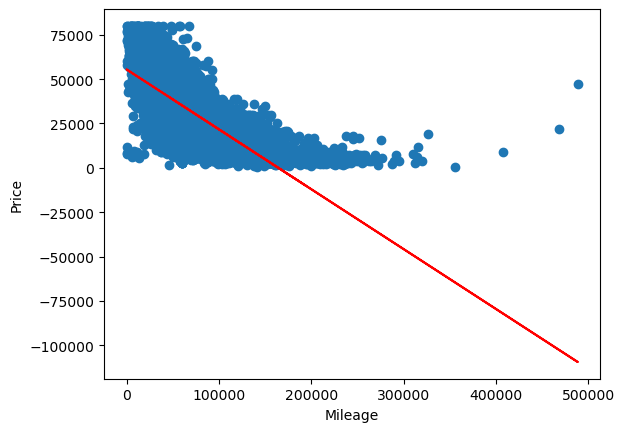

In [393]:
# Create a scatter plot of price vs mileage and plot the regression calculated above
plt.scatter(used_cars['mileage'], used_cars['price'])
plt.plot(used_cars['mileage'], model.predict(), color='red')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

### 3. You might notice that the linear fit does not capture the true relationship well. Use k-NN and regression trees to find the relationship between price and mileage. Use cross-validation to find the optimal tuning parameters for these two procedures: k for k-NN and the number of leaves for decision trees.

In [437]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(used_cars[['mileage']], used_cars['price'], test_size=0.2, random_state=42)
y = used_cars['price']
X = used_cars[['mileage']]

### KNNClassifier

In [417]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2_model = knn2.fit(X_train, y_train)
y_pred_knn2 = knn2_model.predict(X_test)


/Users/amankrishna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


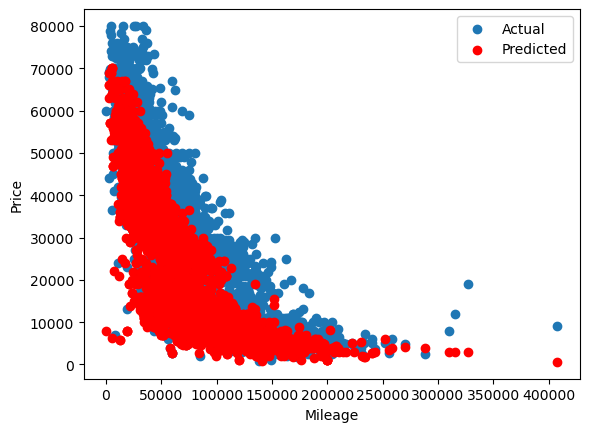

In [419]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_knn2, color='red')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(['Actual', 'Predicted'])
plt.show()


### Decision Tree Classification

In [409]:
k=17
clf = DecisionTreeClassifier(max_depth=k)
clf_model = clf.fit(X_train, y_train)
y_pred_dt = clf_model.predict(X_test)

Text(0.5, 1.0, 'Scatter plot of y vs x using testing data with Decision Tree fitted line for k=17')

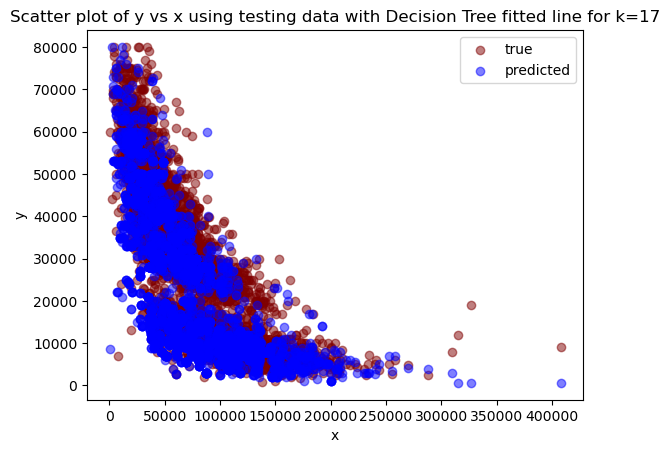

In [410]:
plt.scatter(X_test, y_test, color='maroon', alpha=0.5)
plt.scatter(X_test, y_pred_dt, color='blue', alpha=0.5)
plt.legend(['true', 'predicted'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of y vs x using testing data with Decision Tree fitted line for k={}'.format(k))

### KNNClassifier Parameters Cross Validation

In [ ]:
k_range = range(1, 85)
k_scores = []
k_lossess = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv=5, scoring='accuracy')
    loss = abs(cross_val_score(knn, X,y, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(scores.mean())
    k_lossess.append(loss.mean())
# plot to see clearly


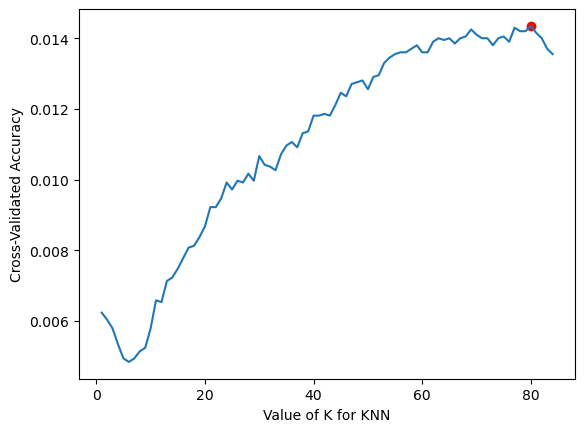

In [444]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#highlight the maximum accuracy
plt.scatter(k_range[k_scores.index(max(k_scores))], max(k_scores), color='red')
plt.show()

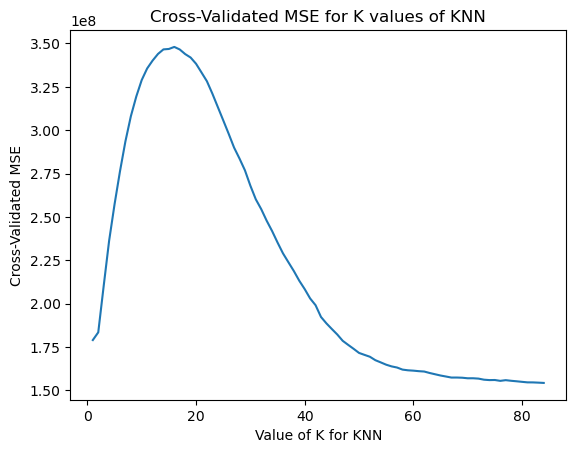

In [443]:
plt.plot(k_range, k_lossess)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.title('Cross-Validated MSE for K values of KNN')
plt.show()

In [445]:
print('The maximum accuracy is {} with k={}'.format(max(k_scores), k_range[k_scores.index(max(k_scores))]))

The maximum accuracy is 0.014354842276062419 with k=80


### Decision Tree Regression Parameters Cross Validation

In [ ]:
lpo = LeavePOut(p=)
scores = cross_val_score(clf, used_cars[['mileage']], used_cars['price'], cv = lpo)

In [ ]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [447]:
tr_range = range(2, 15)
tr_scores = []
tr_lossess = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in tr_range:
    clf = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, X,y, cv=5, scoring='accuracy')
    loss = abs(cross_val_score(clf, X,y, cv=5, scoring='neg_mean_squared_error'))
    tr_scores.append(scores.mean())
    tr_lossess.append(loss.mean())

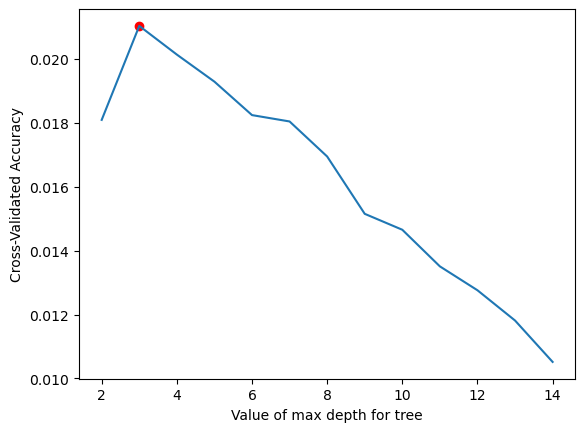

In [448]:
plt.plot(tr_range, tr_scores)
plt.xlabel('Value of max depth for tree')
plt.ylabel('Cross-Validated Accuracy')
#highlight the maximum accuracy
plt.scatter(tr_range[tr_scores.index(max(tr_scores))], max(tr_scores), color='red')
plt.show()

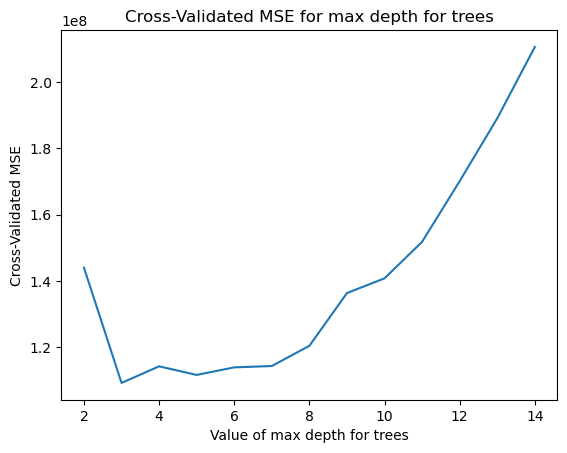

In [449]:
plt.plot(tr_range, tr_lossess)
plt.xlabel('Value of max depth for trees')
plt.ylabel('Cross-Validated MSE')
plt.title('Cross-Validated MSE for max depth for trees')
plt.show()

### Hence for Price to Mileage relationship, the best KNN model is with K=80, and the best Decision Tree model is with max_depth=3

#### Between the Decision Tree and KNN models, the Decision Tree model performs better. This is because the Decision Tree model is able to capture the true relationship between Price and Mileage better than the KNN model when comparing the MSE statistics.

### 4. Use Year as additional input variable to predict price. Use cross-validation to find the optimal tuning parameters for these two procedures: k for k-NN and the number of leaves for decision trees.

In [452]:
#rescale the year for modelling
used_cars['year'] = used_cars['year'] - 2000
X = used_cars[['year', 'mileage']]
y = used_cars['price']

In [453]:
k_range = range(1, 85)
k_scores = []
k_lossess = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv=5, scoring='accuracy')
    loss = abs(cross_val_score(knn, X,y, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(scores.mean())
    k_lossess.append(loss.mean())
# plot to see clearly


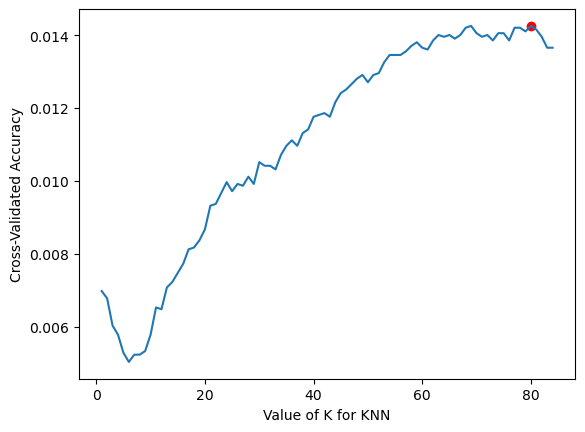

In [454]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#highlight the maximum accuracy
plt.scatter(k_range[k_scores.index(max(k_scores))], max(k_scores), color='red')
plt.show()

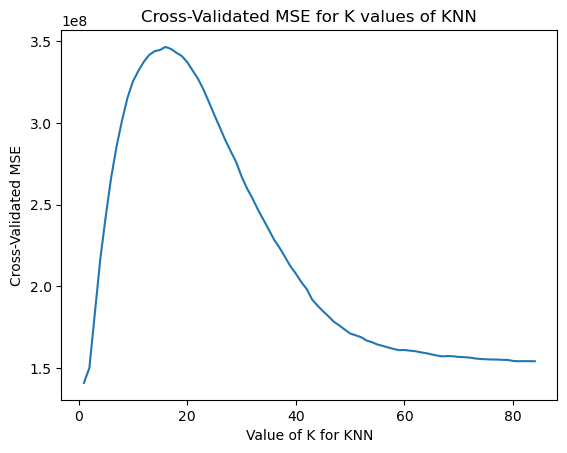

In [455]:
plt.plot(k_range, k_lossess)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.title('Cross-Validated MSE for K values of KNN')
plt.show()

In [456]:
print('The maximum accuracy is {} with k={}'.format(max(k_scores), k_range[k_scores.index(max(k_scores))]))

The maximum accuracy is 0.014255166223234111 with k=80


### Decision Tree Regression Parameters Cross Validation

In [457]:
tr_range = range(2, 10)
tr_scores = []
tr_lossess = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in tr_range:
    clf = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, X,y, cv=5, scoring='accuracy')
    loss = abs(cross_val_score(clf, X,y, cv=5, scoring='neg_mean_squared_error'))
    tr_scores.append(scores.mean())
    tr_lossess.append(loss.mean())

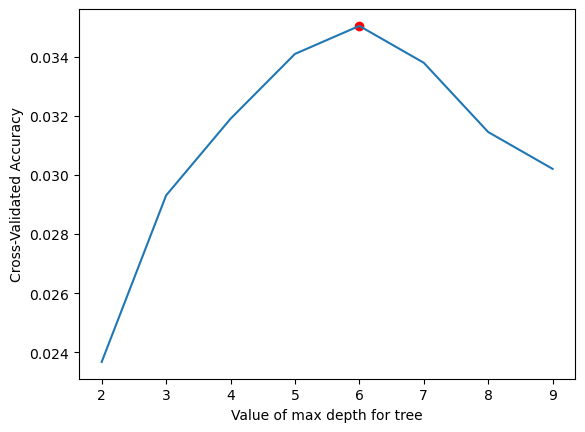

In [458]:
plt.plot(tr_range, tr_scores)
plt.xlabel('Value of max depth for tree')
plt.ylabel('Cross-Validated Accuracy')
#highlight the maximum accuracy
plt.scatter(tr_range[tr_scores.index(max(tr_scores))], max(tr_scores), color='red')
plt.show()

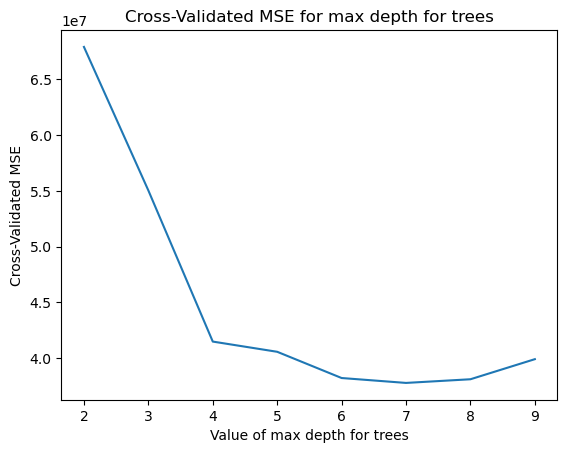

In [459]:
plt.plot(tr_range, tr_lossess)
plt.xlabel('Value of max depth for trees')
plt.ylabel('Cross-Validated MSE')
plt.title('Cross-Validated MSE for max depth for trees')
plt.show()

#### For the Decision Tree model, the best model is with max_depth=6 and we see that the accuracy went up two fold from the previous model when we added the Year variable as an input variable.

#### Decision tree the k increased from 3 to 6, and the accuracy increased. From the KNN we see the the k remains the same even though we add another variable. This is because the KNN model is not able to capture the true relationship between Price and Year, and hence the KNN model performs worse than the Decision Tree model when comparing the MSE statistics.

### 5. Finally, run a regression tree using all the variables to predict price. Report the estimate of the test error for the chosen tree.

In [463]:
# X is all the columns except price
X = used_cars.drop('price', axis=1)
X['year'] = X['year'] - 2000
y = used_cars['price']
X

,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,320,f,193296.0000,-5,Black,3.2000,Gasoline,SoA,unsp,Alloy
1,320,f,129948.0000,-5,other,3.2000,Gasoline,Mid,Premium,Alloy
2,320,f,140428.0000,-3,White,3.2000,Gasoline,Mid,Bose,Alloy
3,420,f,113622.0000,-1,Silver,4.2000,Gasoline,Mid,unsp,Alloy
4,420,f,167673.0000,-1,Silver,4.2000,Gasoline,SoA,unsp,Alloy
...,...,...,...,...,...,...,...,...,...,...
20058,550,t,17181.0000,13,Black,4.6000,Gasoline,WSC,Harman Kardon,Alloy
20059,400,t,53885.0000,10,Black,3.5000,Hybrid,SoA,unsp,unsp
20060,400,f,47484.0000,10,Black,3.5000,Hybrid,WSC,unsp,Alloy
20061,400,f,42972.0000,10,White,3.5000,Hybrid,SoA,unsp,Alloy


In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [468]:
#find type of each column
types = X_train.dtypes
types
#Convert each categorical column to a dummy variable
for col in types[types == 'object'].index:
    X_train[col] = X_train[col].astype('category')
    X_train[col] = X_train[col].cat.codes
    X_test[col] = X_test[col].astype('category')
    X_test[col] = X_test[col].cat.codes
    
types2 = X_train.dtypes
types2

trim               int8
isOneOwner         int8
mileage         float64
year              int64
color              int8
displacement    float64
fuel               int8
region             int8
soundSystem        int8
wheelType          int8
dtype: object

In [470]:
k=6
clf = DecisionTreeClassifier(max_depth=k)
clf_model = clf.fit(X_train, y_train)
y_pred_dt = clf_model.predict(X_test)

In [480]:
tr_range = range(2, 10)
tr_scores = []
tr_lossess = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in tr_range:
    clf = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, X_train,y_train, cv=5, scoring='accuracy')
    loss = abs(cross_val_score(clf, X_train,y_train, cv=5, scoring='neg_mean_squared_error'))
    tr_scores.append(scores.mean())
    tr_lossess.append(loss.mean())

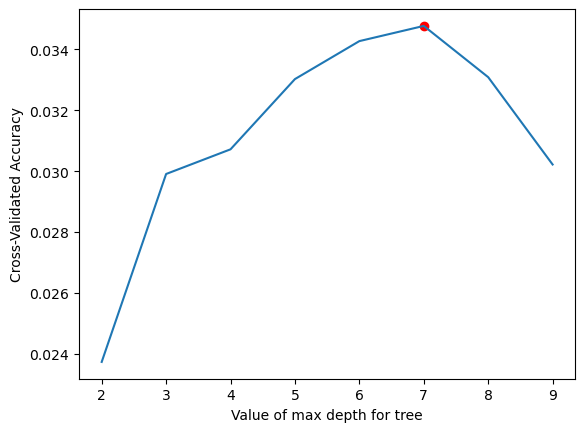

In [481]:
plt.plot(tr_range, tr_scores)
plt.xlabel('Value of max depth for tree')
plt.ylabel('Cross-Validated Accuracy')
#highlight the maximum accuracy
plt.scatter(tr_range[tr_scores.index(max(tr_scores))], max(tr_scores), color='red')
plt.show()

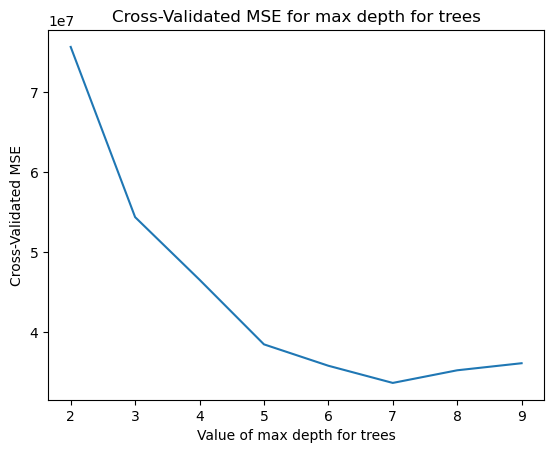

In [482]:
plt.plot(tr_range, tr_lossess)
plt.xlabel('Value of max depth for trees')
plt.ylabel('Cross-Validated MSE')
plt.title('Cross-Validated MSE for max depth for trees')
plt.show()

### Even after including all the variables (converting the categorical ones to dummy) we did not see any improvement in the accuracy of the model. As a further step into this research, we could use PCA to reduce the number of variables and see if we can improve the accuracy of the model, and find the predictive variables.

#### 6. We can use cross-validation to select relevant variables for predicting the price of a used car. Try finding out whether all variables are predictive using regression trees and cross-validation. Think about and describe how would you try to find a simpler model, that is, one that does not include all the variables.

We already use a model using all the variables. As mentioned before, we need to use CV and or PCA to find the most predictive variables. We can then use a model with only the most predictive variables to predict the price of a used car. To find a simpler model, and a more optimized model will be one which has a lesser depth in our decision tree, and use less number of variables. <br>